In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import ta

In [2]:
SYMBOL = 'ETH'
from_csv = pd.read_csv(f'../../data/{SYMBOL}.csv')
df = from_csv.set_index(pd.DatetimeIndex(from_csv['begins_at'].values))
df = df.rename(columns={"begins_at":"time", "open_price":"open", "close_price":"close", "low_price":"low", "high_price":"high"})
df['average'] = df[['high','low']].mean(axis=1)
df = df.drop(columns=["time"])

In [3]:

def scale1ToPrice(price, to_scale):
    return (to_scale / (to_scale.max() - to_scale.min())) * (price.max() - price.min()) + price.min()


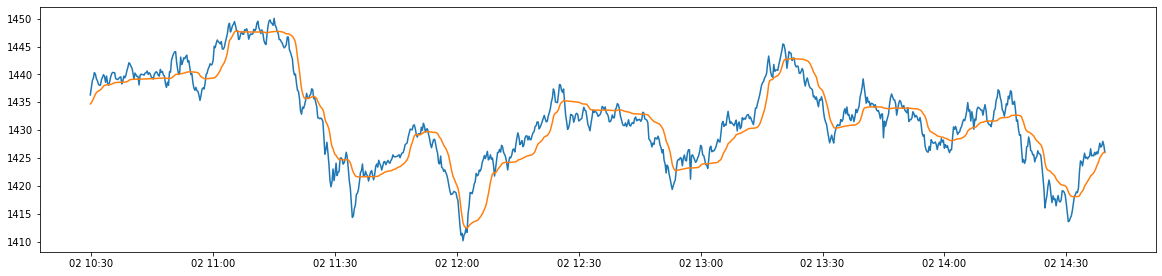

In [4]:
plt.figure(figsize=(20,4.5)) #width = 12.2in, height = 4.5
df['kama'] = ta.momentum.KAMAIndicator(df.average, window = 28).kama()
df['rsi'] = ta.momentum.RSIIndicator(df.average, window= 28).rsi()
plt.plot(df.average.tail(1000))
plt.plot(df.kama.tail(1000))


[]

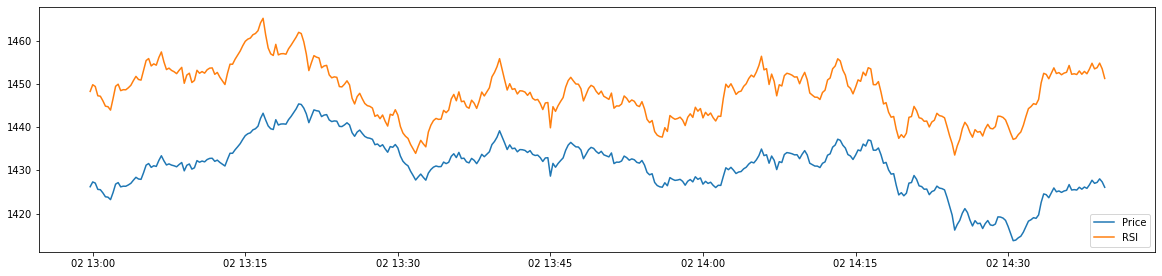

In [5]:
plt.figure(figsize=(20,4.5)) #width = 12.2in, height = 4.5
plt.plot(df.average.tail(400), label="Price")
plt.plot(scale1ToPrice(df.average.tail(400), df.rsi.tail(400)), label="RSI")
plt.legend(loc='lower right')
plt.plot()

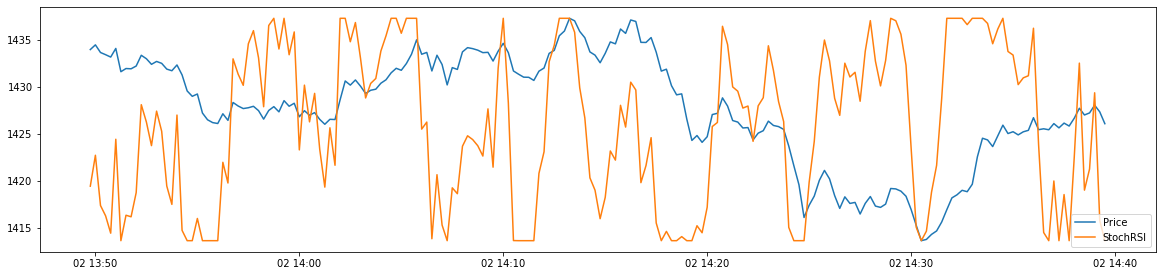

In [6]:
plt.figure(figsize=(20,4.5)) #width = 12.2in, height = 4.5
plt.plot(df.average.tail(200), label="Price")
plt.plot(scale1ToPrice(df.average.tail(200), ta.momentum.StochRSIIndicator(df.average).stochrsi().tail(200)), label="StochRSI")
plt.legend(loc='lower right')
plt.show()